In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma

import pandas as pd
import copy
import os

from PIL import Image, ImageDraw 

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point  # or any other geometry type you're using

In [3]:
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.missing_values import fill_missing_values

In [42]:
from darts.models import LinearRegressionModel
from darts import TimeSeries

In [5]:
from src.masks import build_masks, mask_statistics
from src.partition import batch_statistics

In [538]:
# images_base = '/media/tom/Research Storage/uil/nightlights/data/city_images_monthly/25km'
# city = 'tianjin'

# city_images = os.path.join(images_base, city, 'postprocessed_numpy')
# city_image_paths = [ os.path.join(city_images, image) for image in sorted(os.listdir(city_images)) ]

In [537]:
# city_image_paths[60]

In [536]:
# sample_image = np.load(city_image_paths[0]).squeeze()

In [535]:
# masks = build_masks(sample_image)

In [534]:
# plt.figure(figsize=(5,5), dpi=200)
# cax = plt.imshow(sample_image, interpolation='nearest')
# colorbar = plt.colorbar(cax)
# colorbar.set_label('nW/cm2/sr')  # Setting the label for the colorbar

# plt.axis("off")

# plt.title("Tianjin - Janurary 2014")
# plt.show()

In [533]:
# masked_m0 = ma.masked_array(sample_image, ~masks['m0'])
# masked_m1 = ma.masked_array(sample_image, ~masks['m1'])
# masked_m2 = ma.masked_array(sample_image, ~masks['m2'])

In [532]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4), dpi=120)

# choice_cmap = "viridis"
# ax1.imshow(masked_m0, cmap=choice_cmap)
# ax1.set_title("Core")
# ax1.axis("off")

# ax2.imshow(masked_m1, cmap=choice_cmap)
# ax2.set_title("Inner Ring")
# ax2.axis("off")

# ax3.imshow(masked_m2, cmap=choice_cmap)
# ax3.set_title("Outer Ring")
# ax3.axis("off")

# plt.tight_layout()
# plt.show()

In [18]:
cities = pd.read_csv("cities_monthly.txt", quotechar="'")
cities

name      country   latitude   longitude
0      chennai        india  13.095633   80.241031
1    bengaluru        india  12.958159   77.595546
2      madurai        india   9.923329   78.120298
3       cochin        india   9.947617   76.273311
4      colombo    sri lanka   6.919033   79.861464
..         ...          ...        ...         ...
186    incheon  korea, rep.  37.451520  126.704117
187       guri  korea, rep.  37.598992  127.133021
188   cheongju  korea, rep.  36.627089  127.493047
189       xian        china  34.244598  108.945443
190  zhengzhou        china  34.780368  113.616943

[191 rows x 4 columns]

In [113]:
batched = pd.read_csv("aggregated_statistics.csv", parse_dates=["Date"])

In [114]:
removing_cities = []
for city in batched.City.unique():
    cityb = batched[batched.City == city]
    iszero = cityb.Value <= 0
    if np.any(iszero):
        removing_cities.append(city)
        
removing_cities = removing_cities + ['sasebo']

In [115]:
removed_cities = cities[~cities.name.isin(removing_cities)]
removed_cities

name      country   latitude   longitude
0      chennai        india  13.095633   80.241031
1    bengaluru        india  12.958159   77.595546
2      madurai        india   9.923329   78.120298
3       cochin        india   9.947617   76.273311
4      colombo    sri lanka   6.919033   79.861464
..         ...          ...        ...         ...
186    incheon  korea, rep.  37.451520  126.704117
187       guri  korea, rep.  37.598992  127.133021
188   cheongju  korea, rep.  36.627089  127.493047
189       xian        china  34.244598  108.945443
190  zhengzhou        china  34.780368  113.616943

[182 rows x 4 columns]

In [133]:
realbatched = batched[~batched.City.isin(removing_cities)].reset_index(drop=True)
realbatched['Value'] = np.log(realbatched['Value'])
realbatched

City       Date Mask Statistic     Value
0       nonthaburi 2018-11-01   m0    median  3.170419
1       nonthaburi 2018-11-01   m0      mean  3.302936
2       nonthaburi 2018-11-01   m0       std  2.712947
3       nonthaburi 2018-11-01   m1    median  2.799951
4       nonthaburi 2018-11-01   m1      mean  2.982273
...            ...        ...  ...       ...       ...
137587      bhopal 2014-04-01   m1      mean  0.517546
137588      bhopal 2014-04-01   m1       std  1.013651
137589      bhopal 2014-04-01   m2    median -0.374011
137590      bhopal 2014-04-01   m2      mean  0.033982
137591      bhopal 2014-04-01   m2       std  0.173244

[137592 rows x 5 columns]

In [134]:
cities.country.unique()

array(['india', 'sri lanka', 'malaysia', 'china', 'singapore', 'pakistan',
       'vietnam', 'thailand', 'bangladesh', 'philippines', 'myanmar',
       'cambodia', 'nepal', 'japan', 'korea, rep.'], dtype=object)

In [135]:
countrybatched = realbatched.merge(
    cities[["name","country"]],
    left_on="City",
    right_on="name"
)

In [136]:
mean_batched = countrybatched[
    (countrybatched.country == "pakistan") &
    (countrybatched.Statistic == "mean") & 
    (countrybatched.Mask == "m0")
]

In [137]:
mean_batched

City       Date Mask Statistic     Value       name   country
30241     karachi 2018-11-01   m0      mean  1.829753    karachi  pakistan
30250     karachi 2018-10-01   m0      mean  1.701260    karachi  pakistan
30259     karachi 2017-08-01   m0      mean  1.430226    karachi  pakistan
30268     karachi 2020-07-01   m0      mean  1.299550    karachi  pakistan
30277     karachi 2020-04-01   m0      mean  1.596090    karachi  pakistan
...           ...        ...  ...       ...       ...        ...       ...
117136  islamabad 2014-09-01   m0      mean  2.030656  islamabad  pakistan
117145  islamabad 2016-09-01   m0      mean  2.039177  islamabad  pakistan
117154  islamabad 2019-06-01   m0      mean  2.480217  islamabad  pakistan
117163  islamabad 2019-08-01   m0      mean  2.272048  islamabad  pakistan
117172  islamabad 2014-04-01   m0      mean  2.122810  islamabad  pakistan

[504 rows x 7 columns]

Text(0, 0.5, 'Mean Radiance')

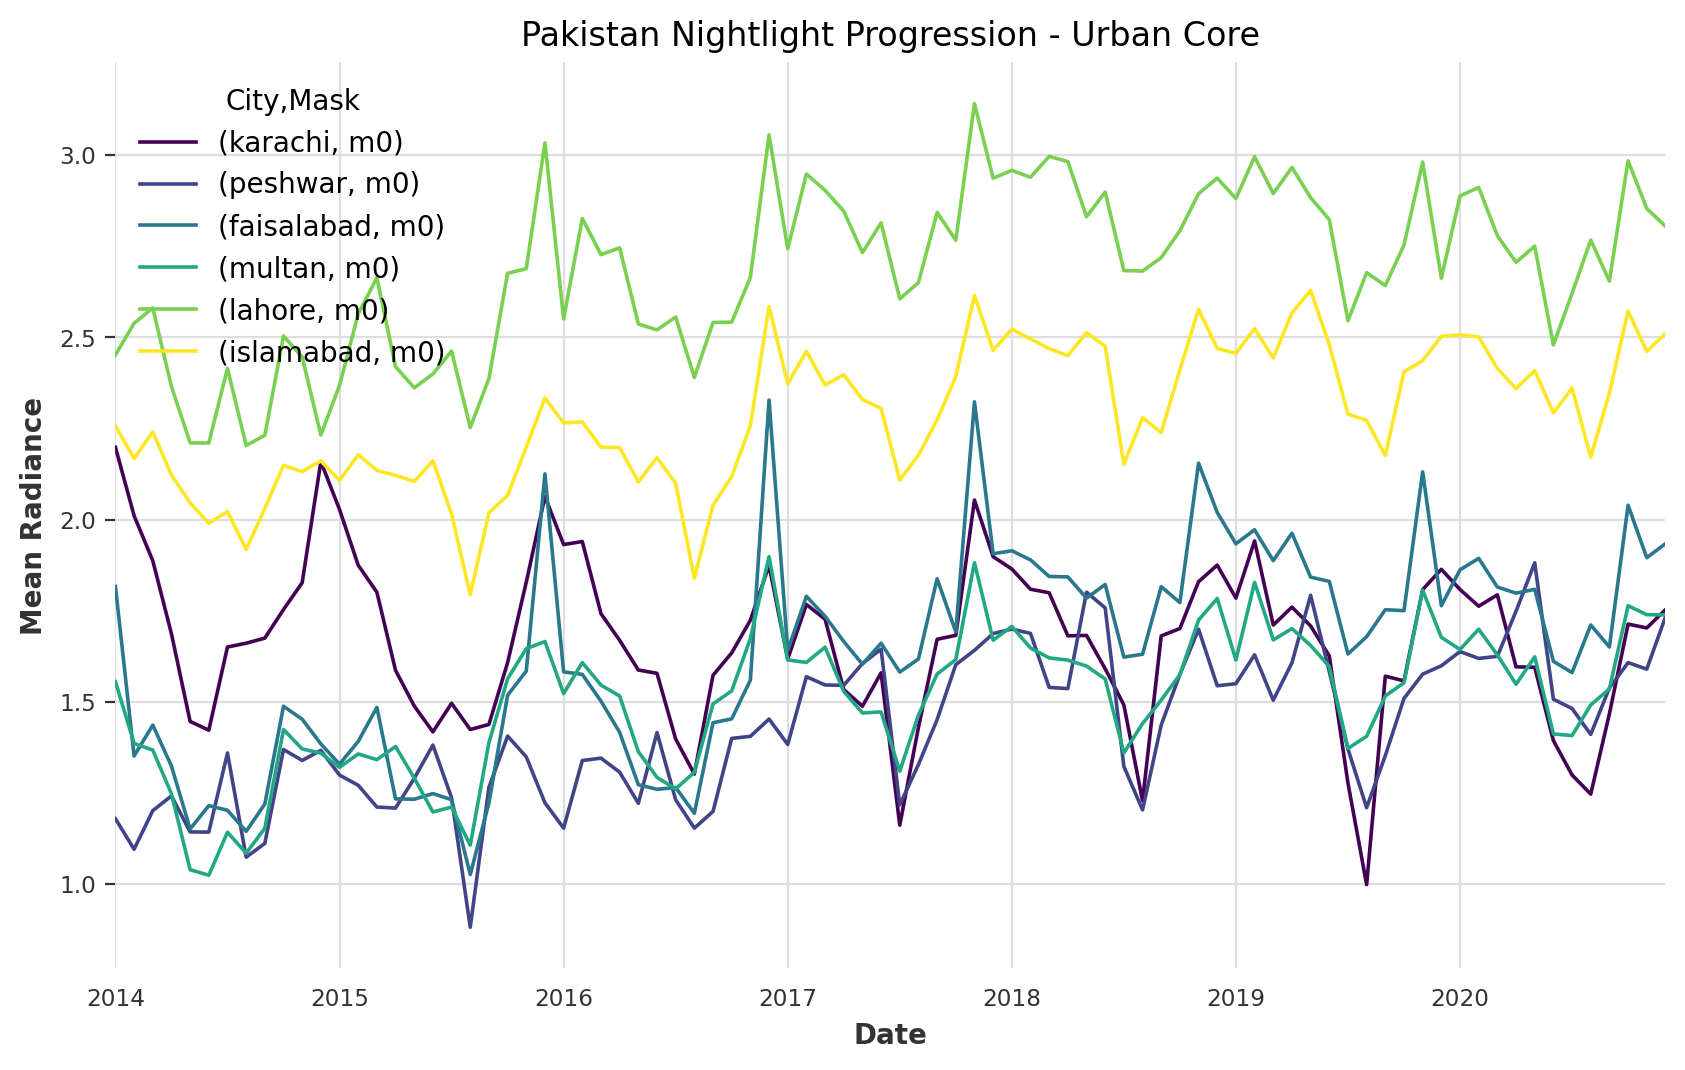

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=200)
mean_batched.pivot(
    index = "Date",
    columns=["City","Mask"],
    values="Value"
).plot(ax=ax, cmap="viridis")

plt.title("Pakistan Nightlight Progression - Urban Core")
plt.ylabel("Mean Radiance")

In [139]:
bangkok_core = realbatched[
    (realbatched.City == "bangkok") & 
#     (batched.Statistic == "mean") &
    (realbatched.Mask == "m0")
]

In [140]:
bangkok_pivot = bangkok_core.drop(columns="Mask").pivot(index="Date", columns=["Statistic"], values="Value")

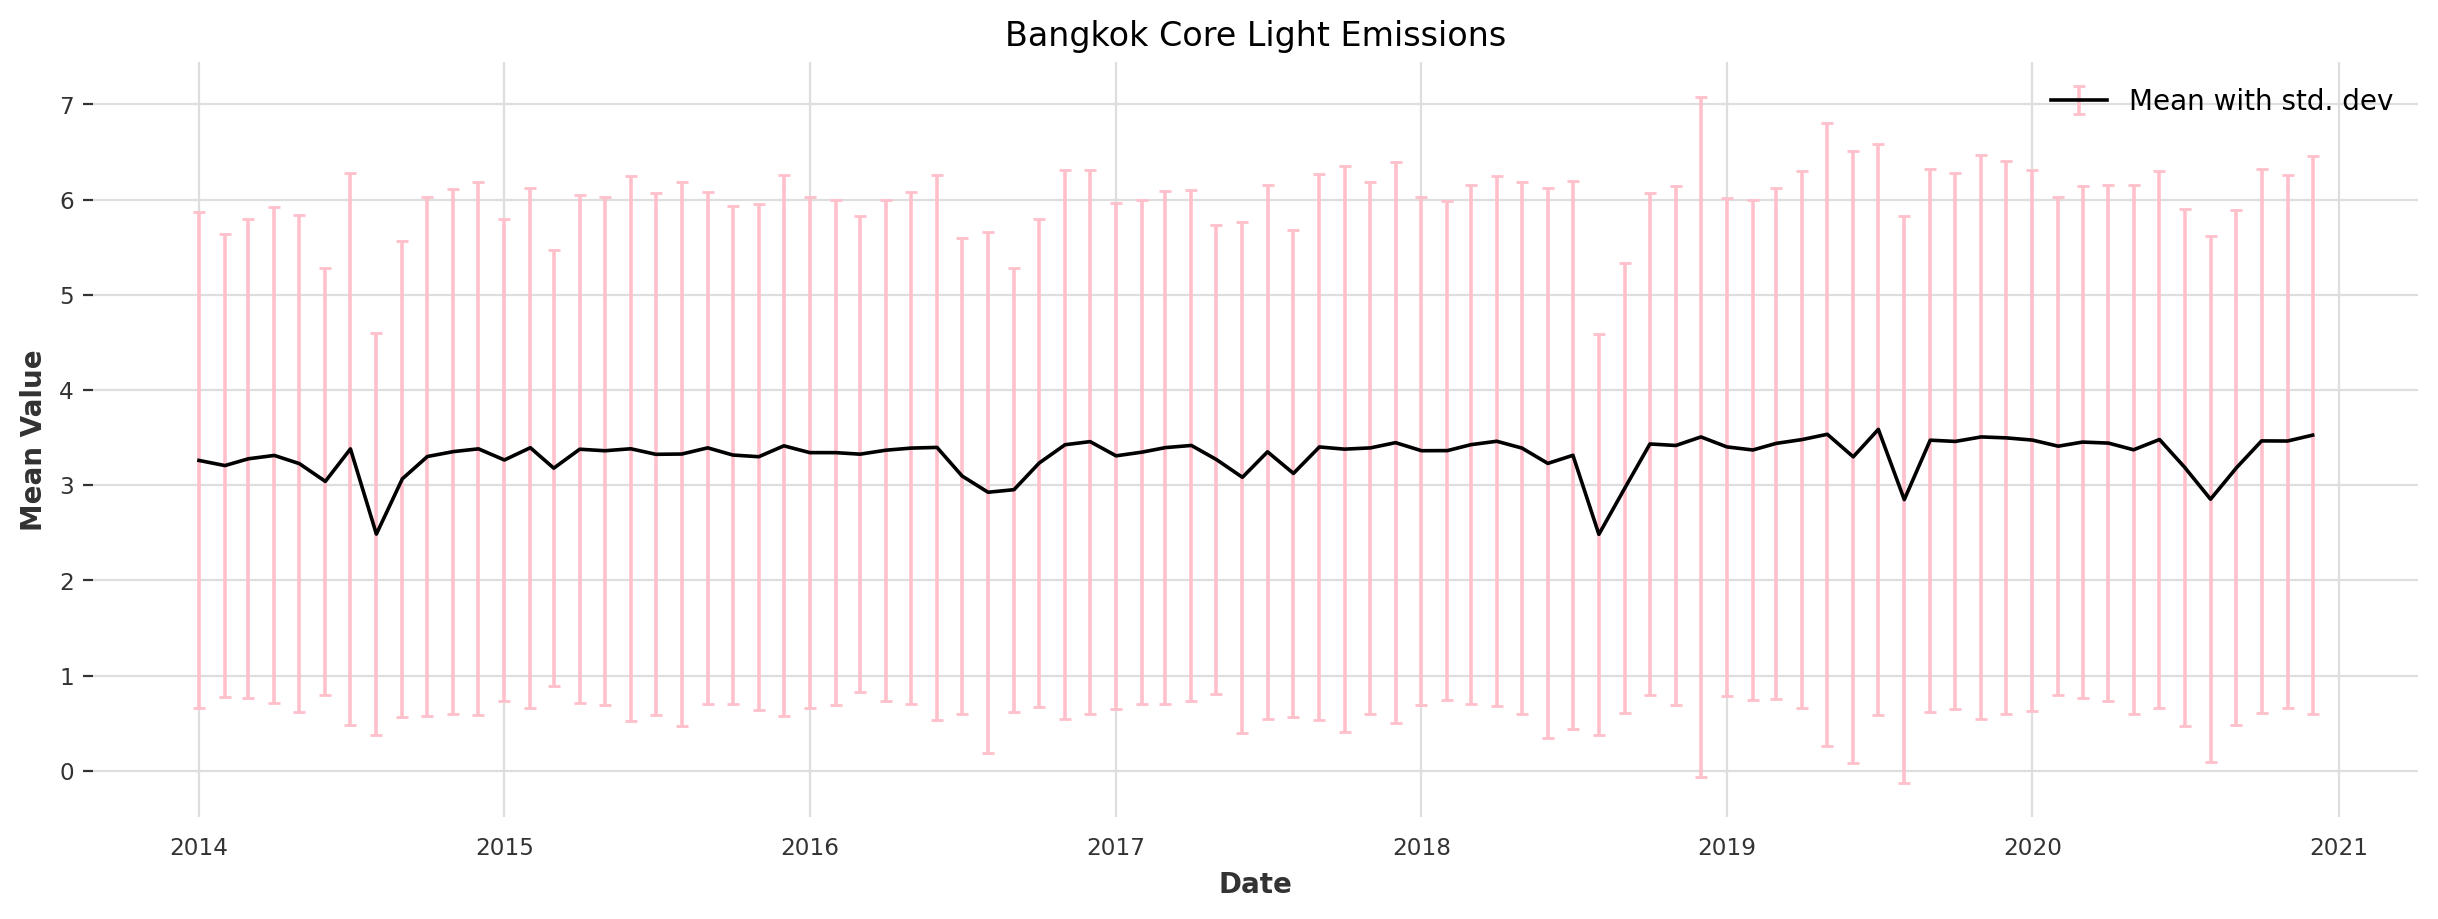

In [141]:
plt.figure(figsize=(15, 5), dpi=200)
plt.errorbar(
    bangkok_pivot.index, 
    bangkok_pivot['mean'], 
    yerr=bangkok_pivot['std'], 
    fmt='-', 
    capsize=2,
    color='black',
    ecolor='pink', 
    label='Mean with std. dev'
)

plt.title('Bangkok Core Light Emissions')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

In [142]:
citynames = countrybatched[['City','country']].drop_duplicates().reset_index(drop=True)
citynames

City     country
0    nonthaburi    thailand
1    chattogram  bangladesh
2       bangkok    thailand
3        hpa an     myanmar
4      haiphong     vietnam
..          ...         ...
177        wuxi       china
178        oita       japan
179      naning       china
180     solapur       india
181      bhopal       india

[182 rows x 2 columns]

In [143]:
gdp = pd.read_csv("gdp_per_capita.csv")
gdp["country"] = gdp.loc[:,"Country Name"].str.lower()
# Melt the DataFrame to convert it from wide to long format
gdp_long = gdp.melt(
    id_vars=[
        'Country Name', 
        'Country Code', 
        'Indicator Name', 
        'Indicator Code', 
        'country'
    ],
    var_name='year',
    value_name='gdp'
)

gdp_long = gdp_long.drop(
    columns=[
        "Country Code", 
        "Country Name", 
        "Indicator Code", 
        "Indicator Name"
    ]
)
gdp_long['gdp'] = pd.to_numeric(gdp_long['gdp'], errors='coerce')
gdp_long = gdp_long[gdp_long['gdp'].notna()]
gdp_long['date'] = pd.to_datetime(gdp_long.year.astype(str) + '-01-01')

gdp_long = gdp_long.drop(columns='year')
gdp_long['gdp'] = np.log(gdp_long['gdp'])

In [144]:
mcol = ['m0'] * len(gdp_long)
gdp_long_ext = pd.concat(
    [gdp_long]
).reset_index(drop=True)

gdp_long_ext['Mask'] = mcol
gdp_long_ext['Statistic'] = ['gdp'] * len(mcol)

gdp_long_ext = gdp_long_ext.rename(columns={"date":"Date",'gdp':'Value'})
gdp_long_ext = gdp_long_ext[gdp_long_ext.Date.isin(countrybatched.Date)]

In [145]:
gdpcities = citynames[["City","country"]].merge(
    gdp_long_ext,
    left_on="country",
    right_on="country",
    how='left'
).rename(columns={"name":"City"})

gdpcities

City   country     Value       Date Mask Statistic
0     nonthaburi  thailand  8.691463 2014-01-01   m0       gdp
1     nonthaburi  thailand  8.672495 2015-01-01   m0       gdp
2     nonthaburi  thailand  8.698398 2016-01-01   m0       gdp
3     nonthaburi  thailand  8.793888 2017-01-01   m0       gdp
4     nonthaburi  thailand  8.895485 2018-01-01   m0       gdp
...          ...       ...       ...        ...  ...       ...
1269      bhopal     india  7.457352 2016-01-01   m0       gdp
1270      bhopal     india  7.591189 2017-01-01   m0       gdp
1271      bhopal     india  7.600032 2018-01-01   m0       gdp
1272      bhopal     india  7.636388 2019-01-01   m0       gdp
1273      bhopal     india  7.566881 2020-01-01   m0       gdp

[1274 rows x 6 columns]

In [146]:
pop = pd.read_csv("population_density.csv")
pop["country"] = pop.loc[:,"Country Name"].str.lower()
# Melt the DataFrame to convert it from wide to long format
pop_long = pop.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'country'],
                  var_name='year',
                  value_name='population_density')

pop_long = pop_long.drop(columns=["Country Code", "Country Name", "Indicator Code", "Indicator Name"])
pop_long['population_density'] = pd.to_numeric(pop_long['population_density'], errors='coerce')
pop_long = pop_long[pop_long['population_density'].notna()]
pop_long['date'] = pd.to_datetime(pop_long.year.astype(str) + '-01-01')

pop_long = pop_long.drop(columns='year')

pop_long['population_density'] = np.log(pop_long['population_density'])

In [147]:
mcol = ['m0'] * len(pop_long)
pop_long_ext = pd.concat(
    [pop_long]
).reset_index(drop=True)

pop_long_ext['Mask'] = mcol
pop_long_ext['Statistic'] = ['population'] * len(mcol)

pop_long_ext = pop_long_ext.rename(columns={"date":"Date",'population_density':'Value'})
pop_long_ext = pop_long_ext[pop_long_ext.Date.isin(countrybatched.Date)]

In [148]:
popcities = citynames[["City","country"]].merge(
    pop_long_ext,
    left_on="country",
    right_on="country",
    how='left'
).rename(columns={"name":"City"})

In [149]:
cbformat = countrybatched.drop(columns='name')

In [150]:
batched_metadata = pd.concat(
    [
        cbformat,
        popcities,
        gdpcities
    ]
).reset_index(drop=True)

In [151]:
batched_metadata

City       Date Mask Statistic     Value   country
0       nonthaburi 2018-11-01   m0    median  3.170419  thailand
1       nonthaburi 2018-11-01   m0      mean  3.302936  thailand
2       nonthaburi 2018-11-01   m0       std  2.712947  thailand
3       nonthaburi 2018-11-01   m1    median  2.799951  thailand
4       nonthaburi 2018-11-01   m1      mean  2.982273  thailand
...            ...        ...  ...       ...       ...       ...
140135      bhopal 2016-01-01   m0       gdp  7.457352     india
140136      bhopal 2017-01-01   m0       gdp  7.591189     india
140137      bhopal 2018-01-01   m0       gdp  7.600032     india
140138      bhopal 2019-01-01   m0       gdp  7.636388     india
140139      bhopal 2020-01-01   m0       gdp  7.566881     india

[140140 rows x 6 columns]

In [423]:
unique_cities = batched_metadata['City'].unique()

full_target = []
train_target = []
test_target = []

train_covariates = []
test_covariates = []

split_date = "2019-01-01"

for city in unique_cities:
    # to pull out the means for each zone - endog
    mean_city = batched_metadata[
        (batched_metadata['City'] == city) &
        (batched_metadata['Statistic'] == "mean")
    ]

    zone_means = mean_city.drop(
        columns=["City","Statistic"]
    ).pivot(
        index="Date", 
        columns=["Mask"], 
        values= "Value"
    )
    
    ## these are all of the covariate terms
    nbatch_city = batched_metadata[
        (batched_metadata['City'] == city) &
        (batched_metadata['Statistic'] != "mean")
    ]

    ncity_df = nbatch_city.drop(
        columns=["City"]
    ).pivot(
        index="Date", 
        columns=["Mask","Statistic"], 
        values= "Value"
    )


#     batch_city = countrybatched[
#         (countrybatched['City'] == city) &
# #         (batched['Statistic'] == "mean") &
#         (countrybatched['Mask'] == 'm0')
#     ]
# #     city_df = batch_city.drop_duplicates(subset='Date')
# #     city_df = city_df.set_index("Date").drop(columns=["Mask", "Statistic", "City"]).sort_index()
    
#     city_df = batch_city.drop(
#         columns=["City","Mask","country"]
#     ).pivot(
#         index="Date", 
#         columns=["Statistic"], 
#         values= "Value"
#     )
    
    ts = TimeSeries.from_dataframe(zone_means)
    full_target.append(ts)
    
    train_ts, test_ts = ts.split_before(pd.Timestamp(split_date))
    
    covariates = fill_missing_values(TimeSeries.from_dataframe(ncity_df))
    train_covariate, test_covariate = covariates.split_before(pd.Timestamp(split_date))
    
    train_target.append(train_ts)
    test_target.append(test_ts)
    
    train_covariates.append(train_covariate)
    test_covariates.append(covariates)

In [425]:
train_mapper = dict(zip(unique_cities, zip(train_target, train_covariates)))
test_mapper = dict(zip(unique_cities, zip(test_target, test_covariates)))

outcome_mapper = dict(zip(unique_cities, zip(full_target, test_covariates)))

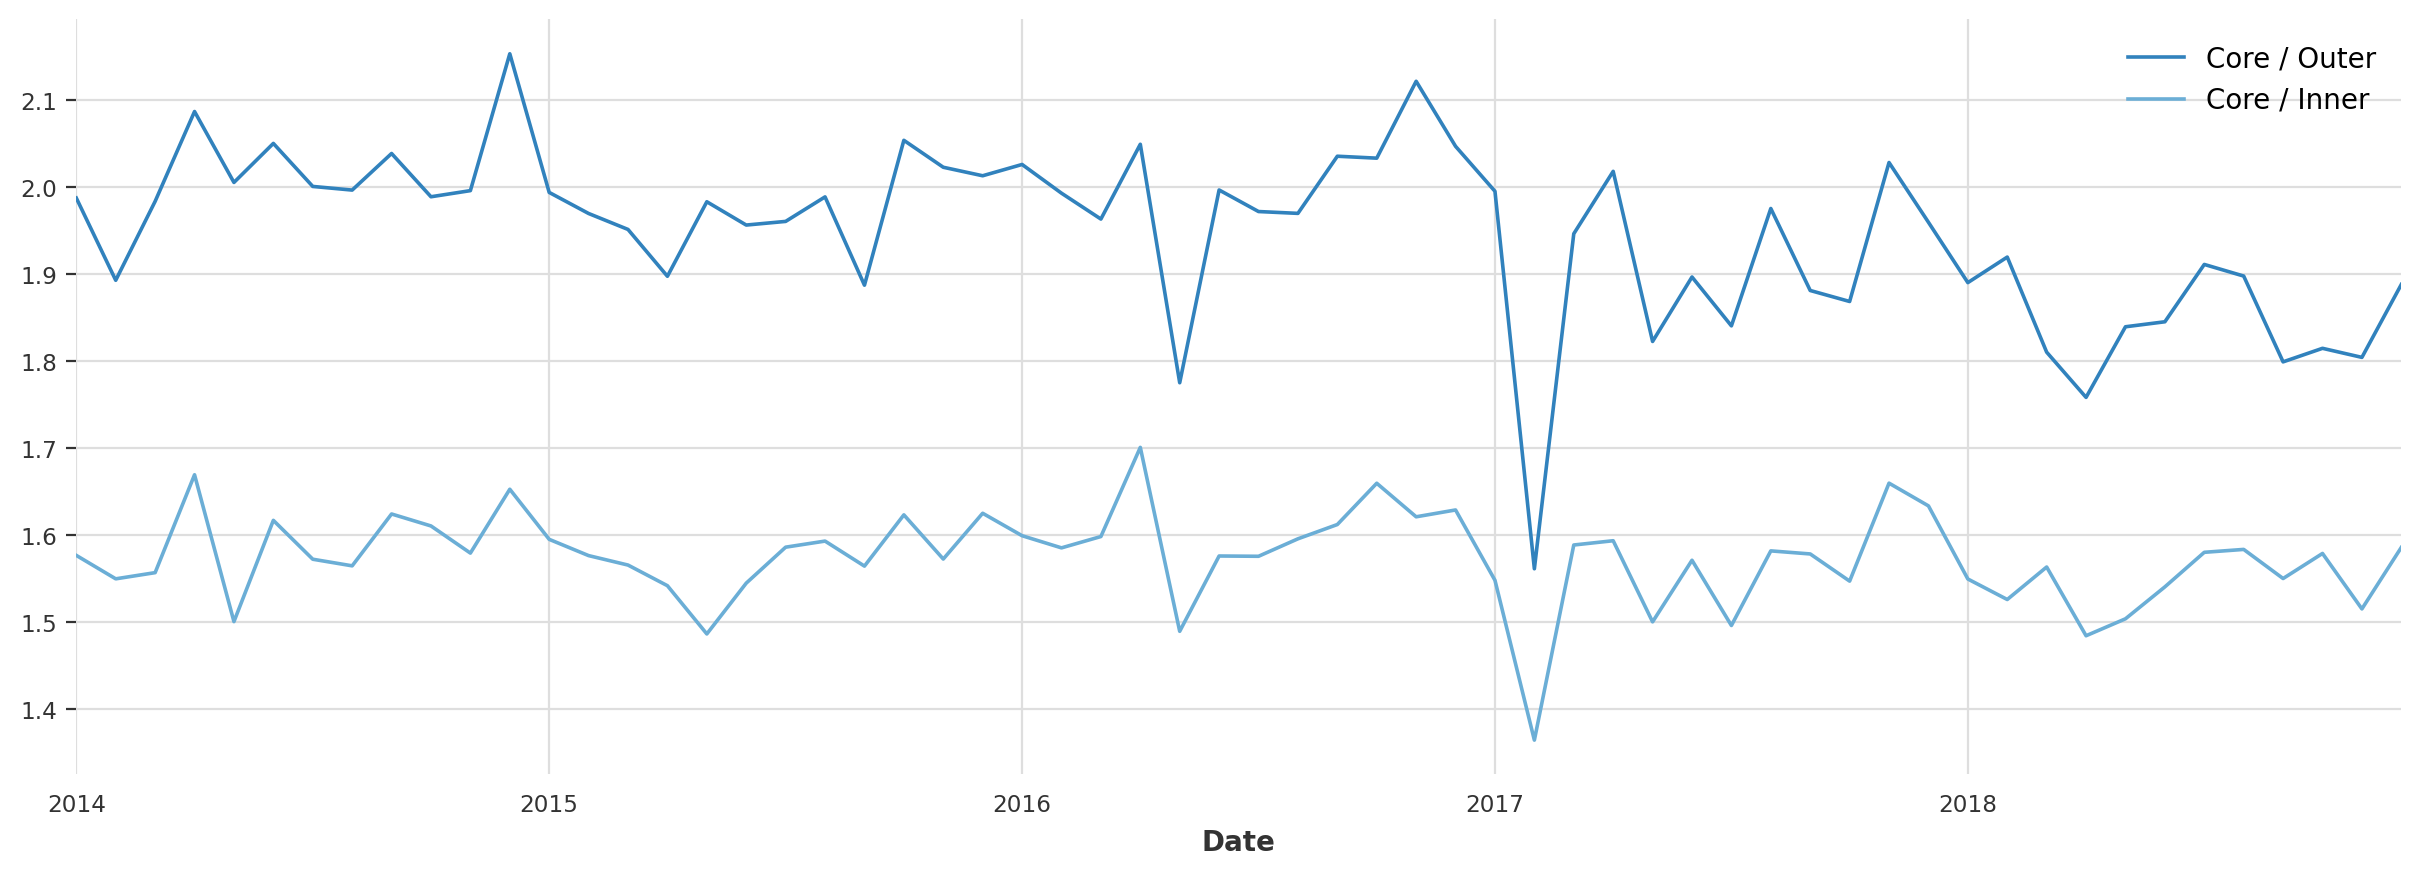

In [154]:
series, covariates = train_mapper['hong kong']
s = series.pd_dataframe()

plt.figure(figsize=(15, 5), dpi=200)
(s['m0'] / s['m2']).plot(label="Core / Outer")
(s['m0'] / s['m1']).plot(label="Core / Inner")

plt.legend()
plt.show()

In [363]:
from darts.models import RegressionModel, ExponentialSmoothing, RegressionEnsembleModel
from darts.models import RegressionEnsembleModel, NaiveSeasonal, LinearRegressionModel
from darts.models import RNNModel

from darts.models.forecasting.random_forest import RandomForest
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import MultiTaskElasticNet
from sklearn import tree

In [331]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [333]:
model = HistGradientBoostingRegressor()
model

HistGradientBoostingRegressor()

In [352]:
MultiTaskElasticNet?

In [391]:
model_citymap = {}

for unique_city in unique_cities:
    series, covariates = train_mapper[unique_city]
    
    model = RegressionModel(
        model= tree.DecisionTreeRegressor(),
        lags=14,
        lags_past_covariates=14,
        output_chunk_length=24
    )
    model.fit(
        series,
        past_covariates = covariates,
    )
    model_citymap[unique_city] = model

In [392]:
pc = plt.cm.tab20c.colors
pcustom = tuple([pc[0],pc[1],pc[2],pc[8],pc[9],pc[10],pc[4],pc[5],pc[6]])

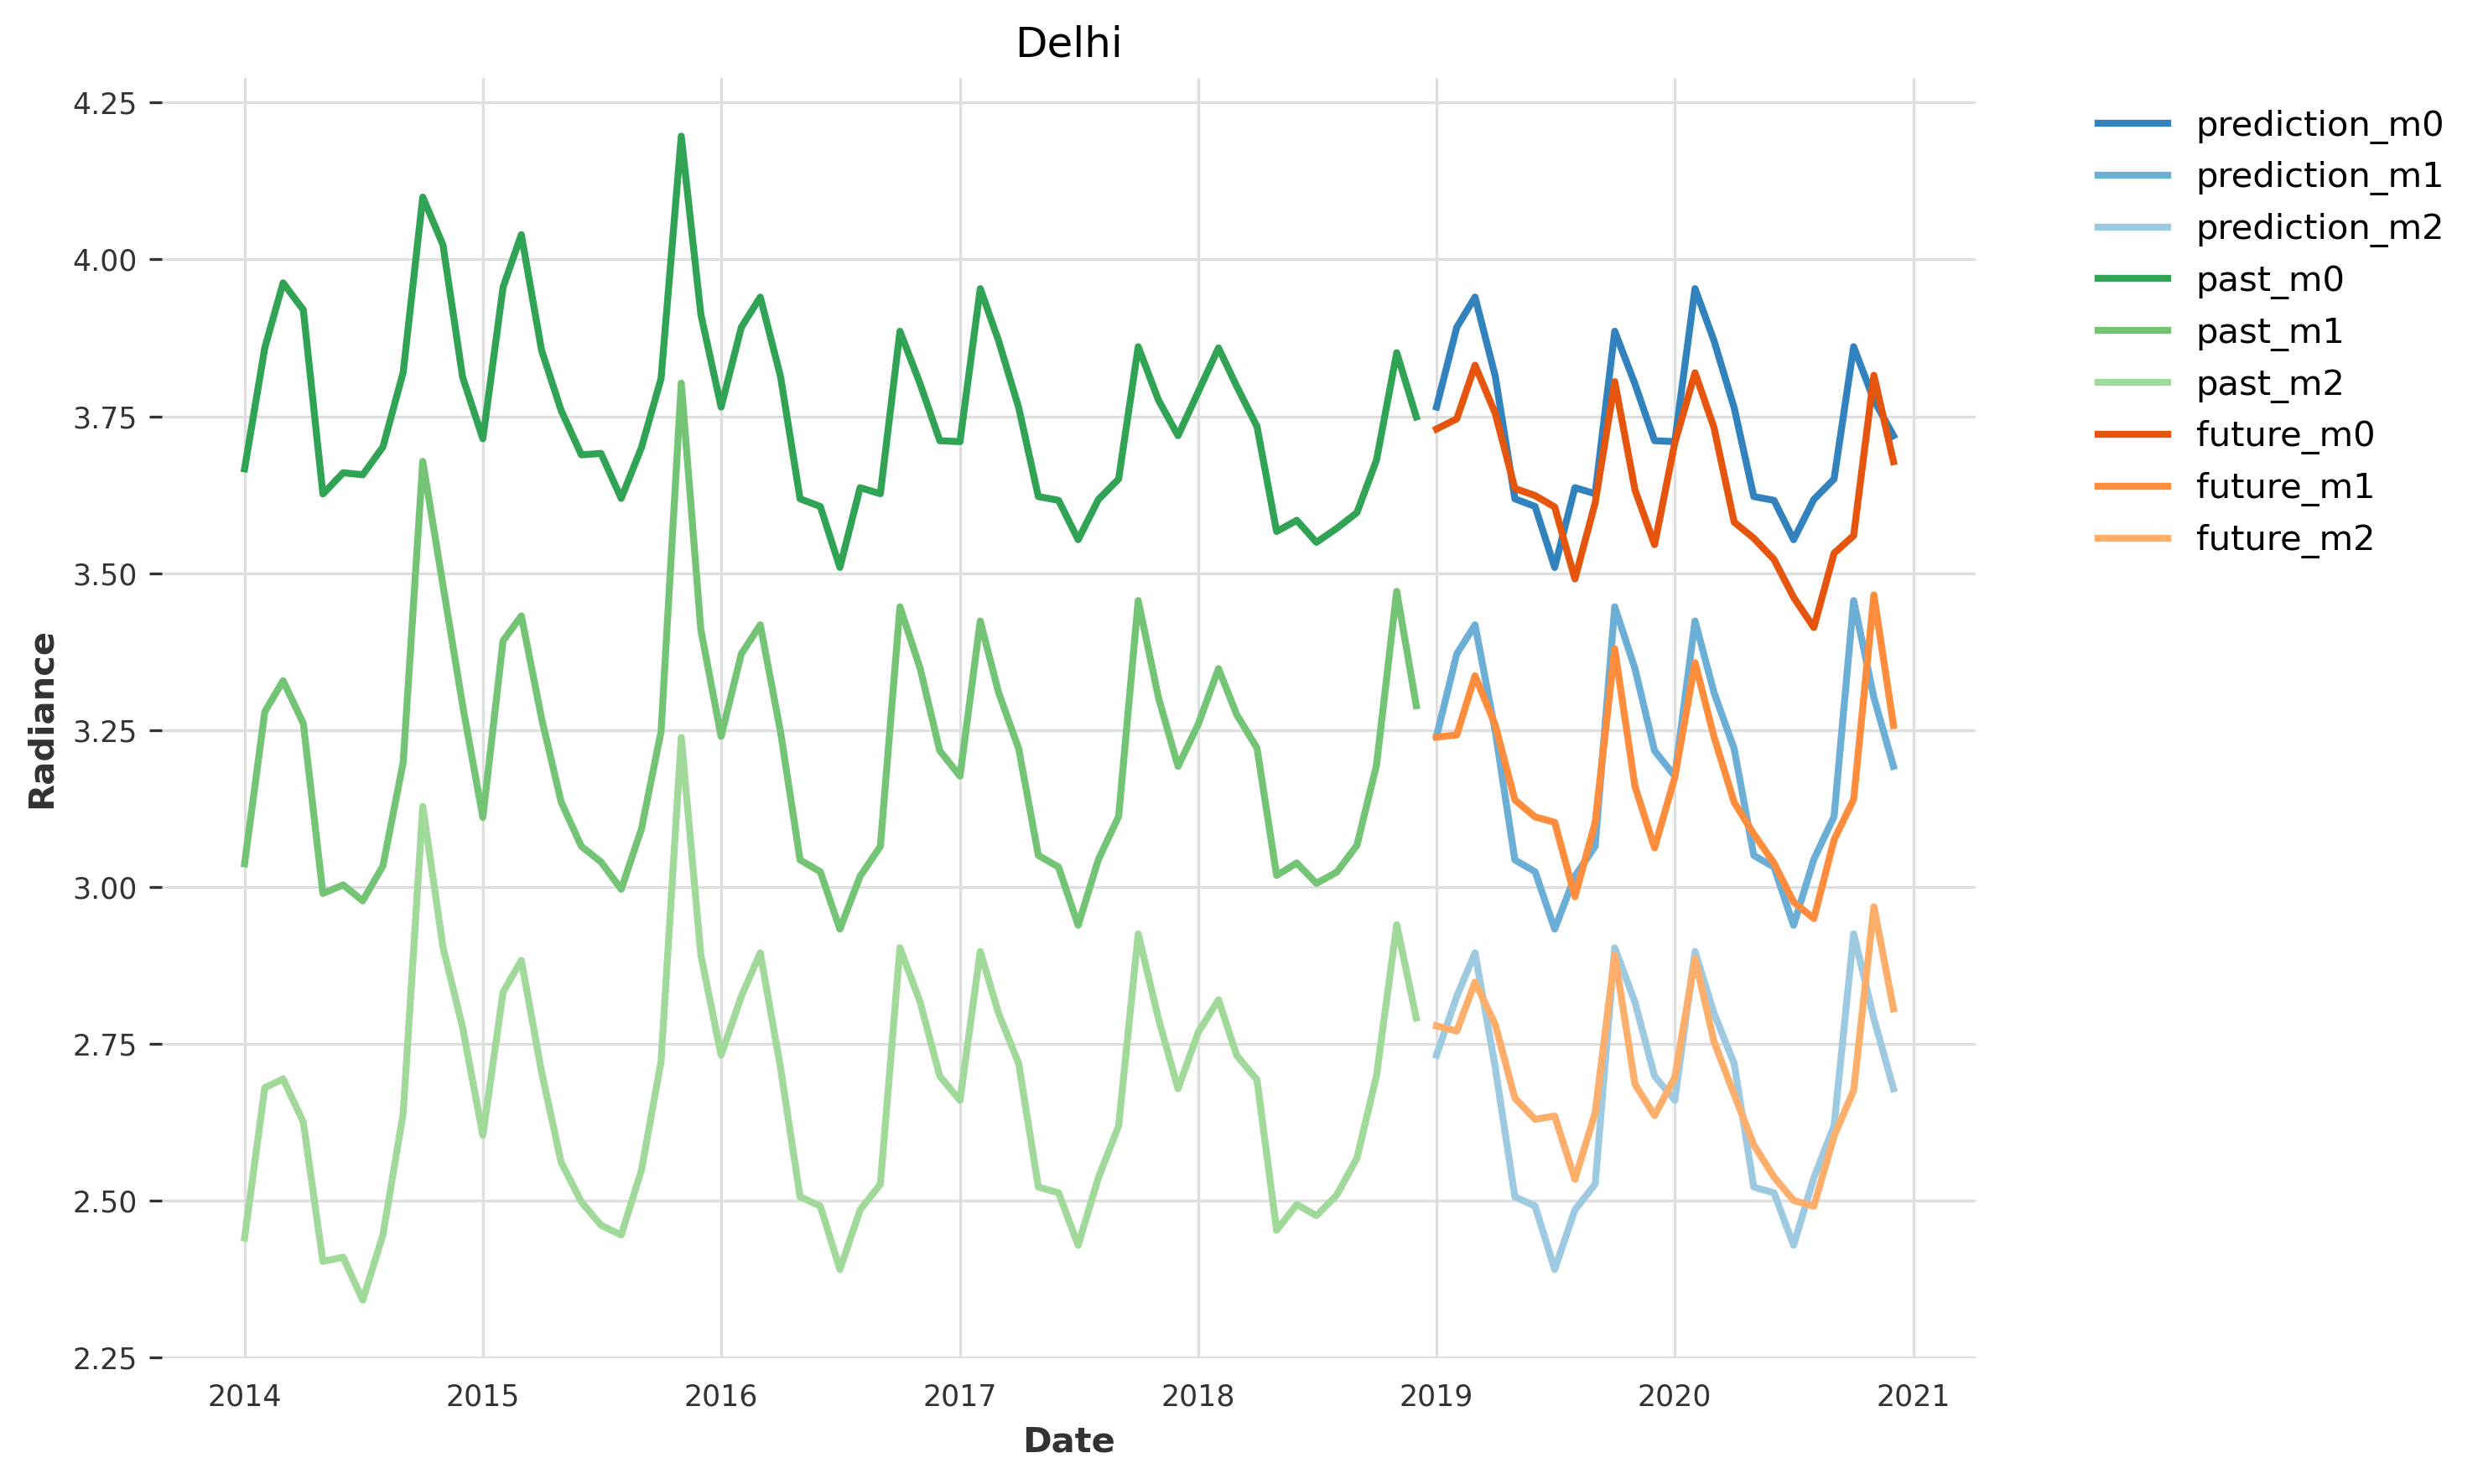

In [420]:
from matplotlib import cycler

city_predictions = 'delhi'
city_series, city_covariates = train_mapper[city_predictions]

# Define your custom color cycle (for example, red, green, and blue)
custom_cycler = cycler('color', ['red', 'green', 'blue'])

plt.figure(figsize=(10, 6), dpi=300)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", pcustom)

training_truth, _ = train_mapper[city_predictions]
testing_truth, testing_covariates = test_mapper[city_predictions]

predictions = model_citymap[city_predictions].predict(
    n = 24,
    series = city_series,
#     past_covariates = testing_covariates,
)

predictions.plot(label="prediction")
training_truth.plot(label="past")
testing_truth.plot(label="future")

plt.title(city_predictions.capitalize())
plt.ylabel("Radiance")

# Adjust the plot size and place the legend outside
plt.gcf().set_size_inches(10, 6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.show()

In [395]:
# np.abs(model_citymap[city_predictions].model.coef_).sum(axis=0)

In [396]:
city_predictions

'lahore'

In [529]:
# from collections import defaultdict

# def default_value():
#     return {'importances':[], 'n':0}

# importances = defaultdict(default_value)

# for index, row in removed_cities.iterrows():
#     cityname = row['name']
#     mimportance = list(zip(
#         model_citymap[cityname].lagged_feature_names,
#         model_citymap[cityname].model.coef_
#     ))
    
#     city_importances = []
#     for key, value in mimportance:
#         if "m0_target_lag" in key:
#             city_importances.append(value)

#     importances[row['country']]['importances'].append(city_importances)
#     importances[row['country']]['n'] += 1

In [398]:
removed_cities.country.unique()

array(['india', 'sri lanka', 'malaysia', 'china', 'singapore', 'pakistan',
       'vietnam', 'thailand', 'bangladesh', 'philippines', 'myanmar',
       'cambodia', 'nepal', 'japan', 'korea, rep.'], dtype=object)

In [530]:
# total_arr = []

# for city in removed_cities.country.unique():
#     total_arr.append(np.array(importances[city]['importances']))
    
# total_arr = np.concatenate(total_arr)

In [531]:
# total_abs.shape

In [401]:
np.arange(-8,0)

array([-8, -7, -6, -5, -4, -3, -2, -1])

In [405]:
# city_predictions = 'islamabad'
# coef_df = pd.DataFrame(dict(zip(
#     model_citymap[city_predictions].lagged_feature_names,
#     model_citymap[city_predictions].model.coef_.T
# )))

# columns_containing_substring = [col for col in coef_df.columns if 'median' in col]
# coef_df[columns_containing_substring].mean(axis=0)

In [406]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [407]:
testing_truth, testing_covariates = test_mapper['seoul']

In [408]:
def np_mape(gt, predictions):
    return np.mean(np.abs((gt - predictions) / gt) * 100, axis=0)

In [409]:
city_validation_errors = []

for city in unique_cities:
    testing_truth, testing_covariates = test_mapper[city]
    gt = testing_truth.values()
    
    city_series, city_covariates = train_mapper[city]
    predictions = model_citymap[city_predictions].predict(
        n = 24,
        series = city_series,
        past_covariates = testing_covariates,
    ).values()
    
    city_validation_errors.append((
        city, 
        *np_mape(gt, predictions)
    ))

In [410]:
city_errors = pd.DataFrame(
    city_validation_errors,
    columns=["City","M0_MAPE","M1_MAPE","M2_MAPE"]
)

city_errors.sort_values(by="M0_MAPE")[:5]

City   M0_MAPE    M1_MAPE    M2_MAPE
25    manila  4.188781   7.870500   9.921265
133  nantong  4.214833  13.068649  38.731263
153   lahore  4.378051   4.751737   7.406956
174  kunming  4.541570  20.085795  27.180120
95     daegu  4.631840   5.642747  22.137748

In [411]:
city_geolocated_errors = cities.merge(city_errors, left_on="name", right_on="City")
city_geolocated_errors.to_csv("city_errors_mape.csv")

In [412]:
import geopandas as gpd

geoerrors = gpd.GeoDataFrame(
    city_geolocated_errors,
    geometry = gpd.points_from_xy(
        x = city_geolocated_errors['longitude'],
        y = city_geolocated_errors['latitude'],
        crs="EPSG:4326"
    )
)

In [413]:
# Path to the Urban Areas shapefile
urban_areas_path = 'urban_shapefiles/ne_10m_urban_areas.shp'  # Update with your path to the shapefile

# Load Urban Areas and add them to the map
urban_areas_gdf = gpd.read_file(urban_areas_path, crs="EPSG:4326")

# We create a GeoDataFrame from geoerrors geometries
geoerrors_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(geoerrors.geometry), crs="EPSG:4326")
geoerrors_gdf = geoerrors_gdf.to_crs(urban_areas_gdf.crs)

# Buffer the points by a certain distance to create a search area (the distance will depend on your specific needs)
# For example, buffer by 1 degree (~111 km at the equator)
buffered_geoerrors = gpd.GeoDataFrame(
    geoerrors_gdf.buffer(1),
    crs = urban_areas_gdf.crs
).rename(columns={0:"geometry"})

/tmp/ipykernel_843569/2833678589.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geoerrors_gdf.buffer(1),
/tmp/ipykernel_843569/2833678589.py:13: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  buffered_geoerrors = gpd.GeoDataFrame(


In [414]:
nearby_urban_areas = gpd.sjoin(
    urban_areas_gdf, 
    buffered_geoerrors, 
    how='inner', 
    predicate='intersects'
)

In [415]:
urban_regions = nearby_urban_areas[nearby_urban_areas.area_sqkm > 100]

In [416]:
# geoerrors[geoerrors.M0_MAPE < 300].explore('M0_MAPE')

In [417]:
geoerrors.country.unique()

array(['india', 'sri lanka', 'malaysia', 'china', 'singapore', 'pakistan',
       'vietnam', 'thailand', 'bangladesh', 'philippines', 'myanmar',
       'cambodia', 'nepal', 'japan', 'korea, rep.'], dtype=object)

/tmp/ipykernel_843569/1203048650.py:67: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.04)
/home/tom/anaconda3/envs/thermal/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/tom/anaconda3/envs/thermal/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


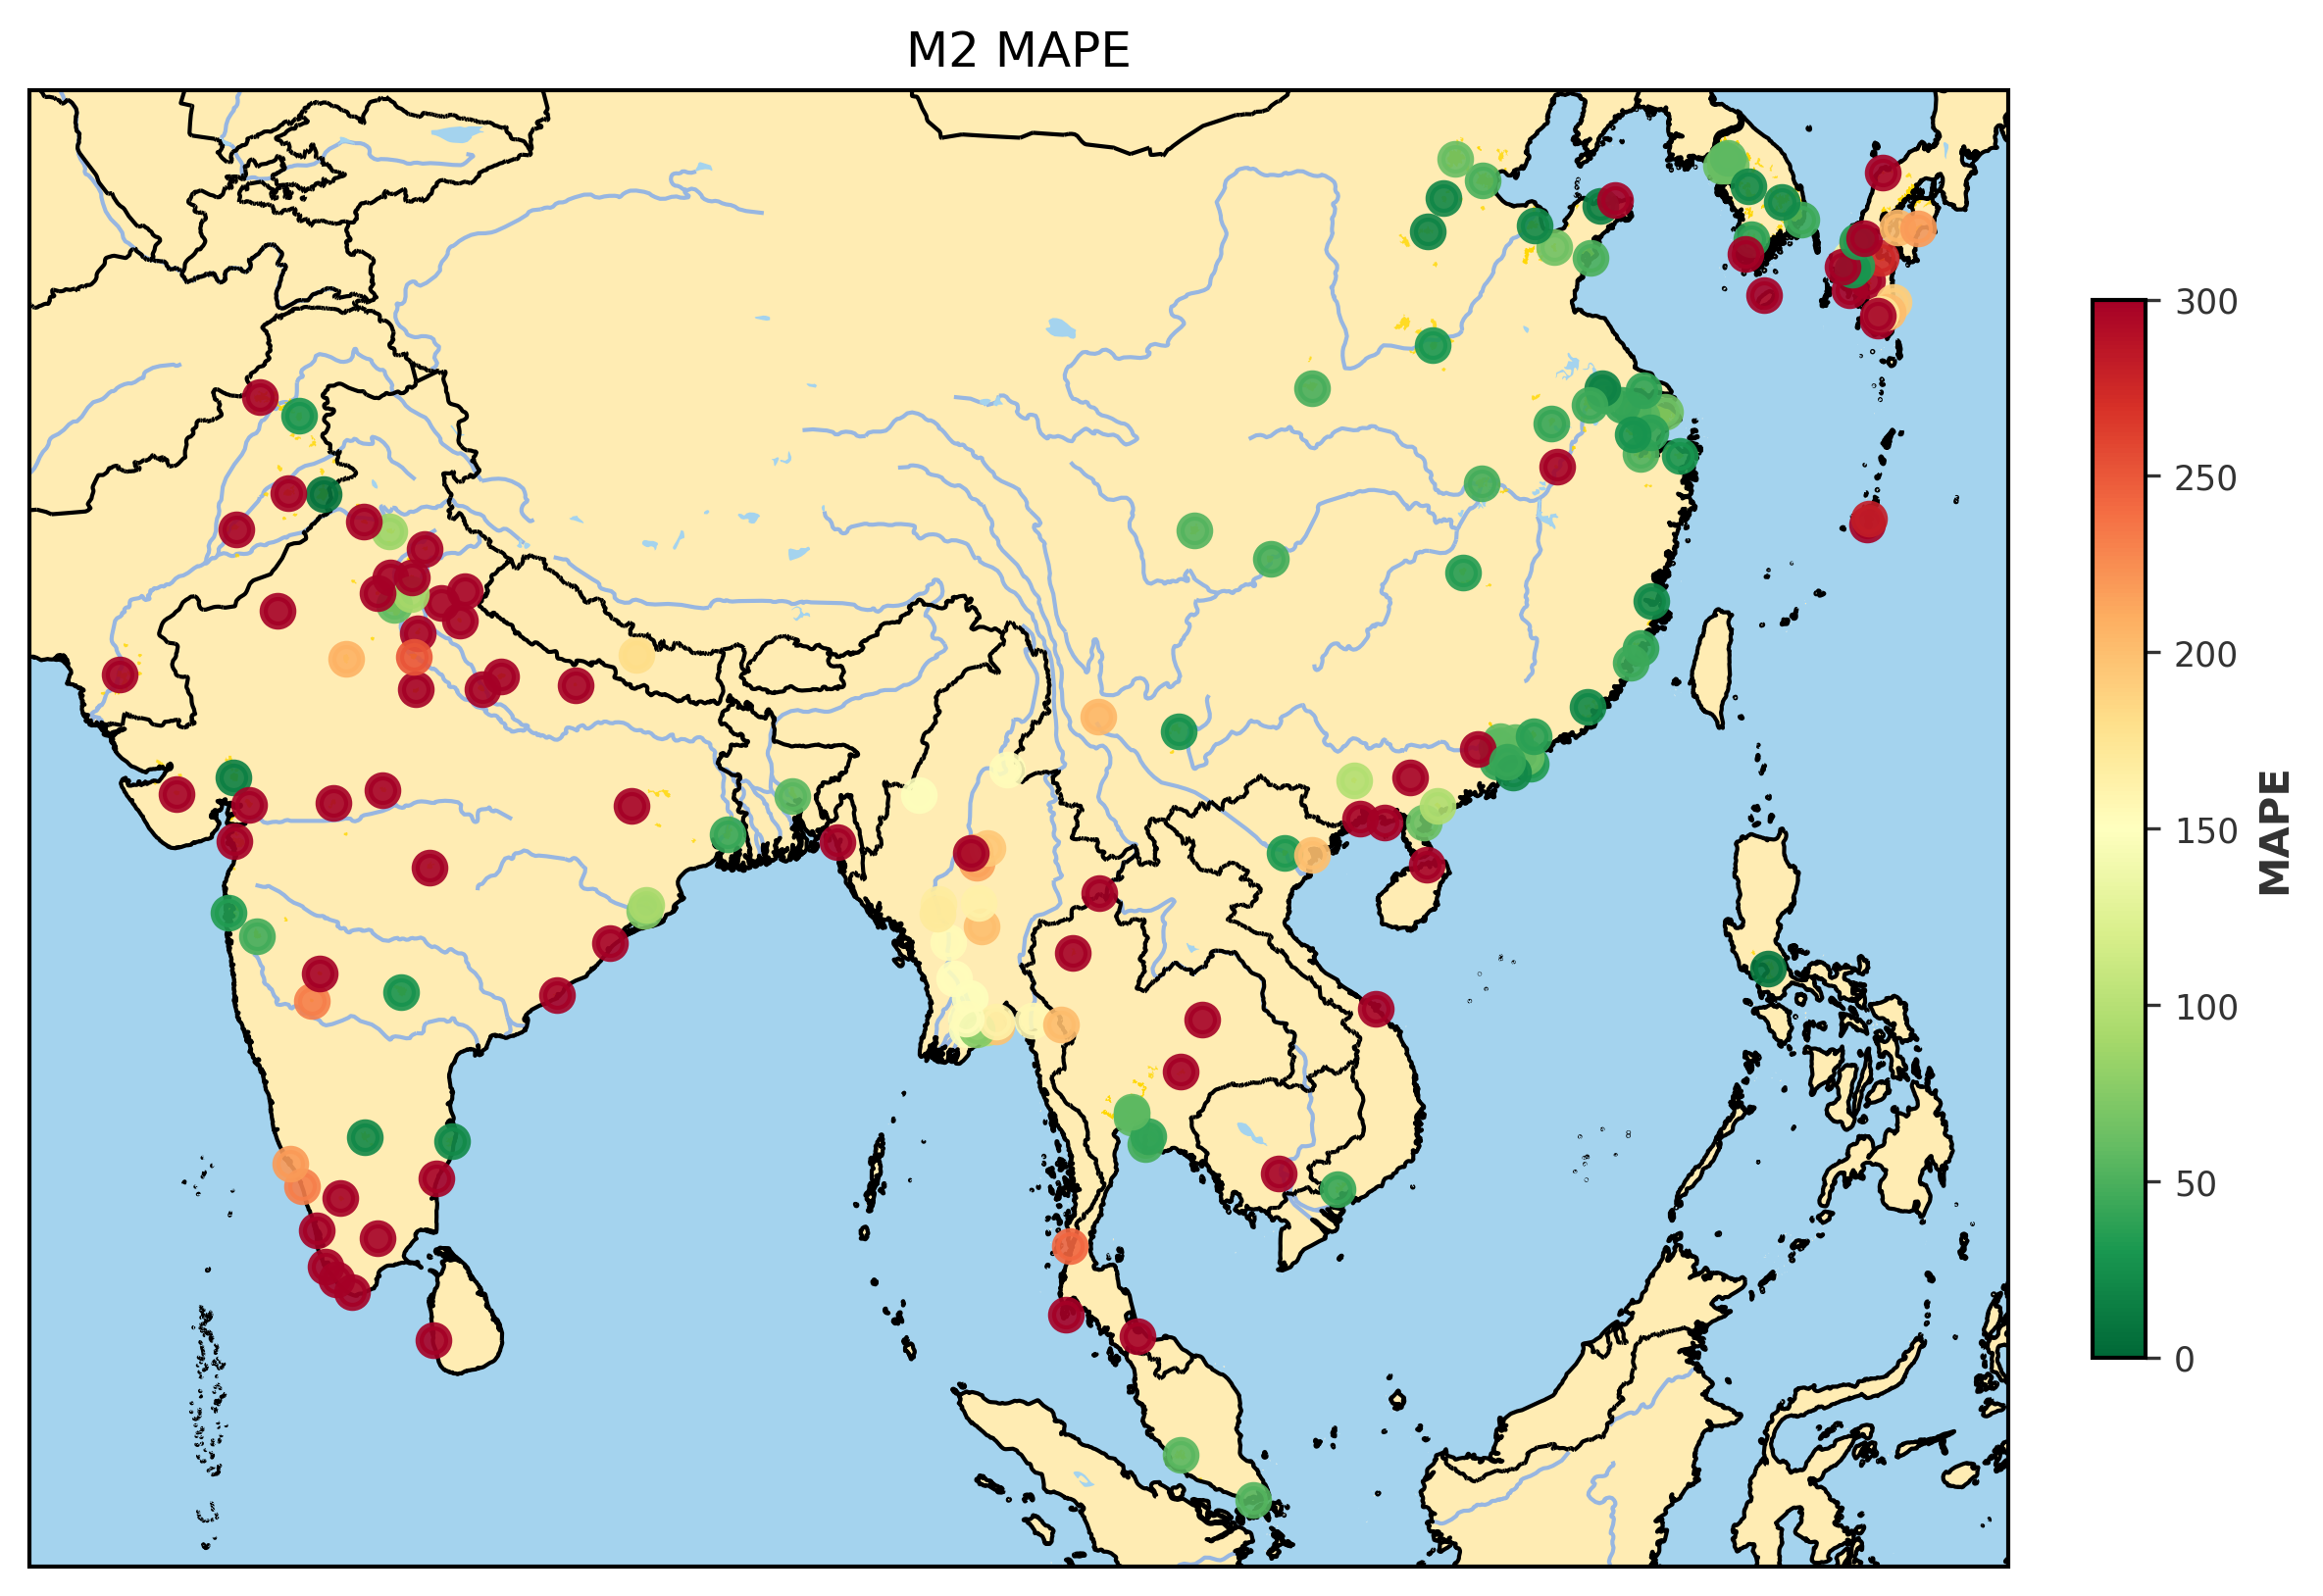

In [548]:
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import cartopy.io.shapereader as shapereader

# Custom colors based on the image provided (replace with actual colors from your image)
water_color = '#a4d3ee'  # A placeholder light blue color for water
land_color = '#ffecb3'   # A placeholder light yellow color for land
urban_color = '#ffd700'  # A placeholder darker yellow color for urban areas

# filtered region
# region = "korea, rep."
regional_errors = geoerrors#[(geoerrors.country.isin(["japan","korea, rep."]))]

# Assuming 'color_column' is the column in geoerrors DataFrame based on which you want to set the colors
metric = 'M2_MAPE'
color_values = regional_errors[metric]

# Normalize the color values to map to the colormap
norm = mcolors.Normalize(vmin=0, vmax=300)
cmap = plt.cm.get_cmap('RdYlGn_r')  # You can choose any available colormap

# Set up the map projection (Orthographic centered on Asia)
projection = ccrs.Orthographic(central_longitude=90, central_latitude=30)

# Create a figure
plt.figure(figsize=(8, 8), dpi=300)
ax = plt.axes(projection=projection)

# Add higher resolution features
ax.add_feature(cfeature.RIVERS.with_scale('50m'), facecolor=water_color)
ax.add_feature(cfeature.LAKES.with_scale('50m'), facecolor=water_color)
ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor=land_color)  # You can adjust the scale

for geom in urban_regions['geometry']:
    ax.add_geometries(
        [geom],  # Add the geometry to a list since add_geometries expects an iterable
        ccrs.PlateCarree(),  # Assuming the geometries are in longitude/latitude
        facecolor=urban_color,
        edgecolor='none',
        alpha=0.8
    )
    
ax.add_feature(cfeature.OCEAN.with_scale('10m'), facecolor=water_color)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.BORDERS.with_scale('10m'))


# Plot each Point geometry with color based on 'color_column'
for point, value in zip(regional_errors.geometry, color_values):
    color = cmap(norm(value))
    ax.plot(
        point.x, 
        point.y, 
        marker='o', 
        markerfacecolor=color,
        markeredgecolor=color,
        markersize=7,
        markeredgewidth=2,  # Adjust border width as needed
        alpha=0.9, 
        transform=ccrs.Geodetic()
    )

# Create a ScalarMappable and use it to create the colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.04)
cbar.set_label("MAPE")  # Replace with your label

# Set the extent of the map to focus on Asia
# ax.set_extent([60, 150, 5, 55], crs=ccrs.PlateCarree())

# Set the extent of the map to show only the northern hemisphere
# ax.set_global()
# ax.set_extent([0, 180, 0, 45], crs=ccrs.PlateCarree())
m_clean = metric.replace("_"," ")
plt.title(f"{m_clean}")
plt.tight_layout()

plt.savefig(f"{metric}_errors.png")

# Show the plot
plt.show()

In [295]:
# geoerror_copy = copy.deepcopy(geoerrors)
# geoerror_copy['M0_MAPE'] = np.clip(geoerror_copy['M0_MAPE'], 0, 300)

# geoerror_copy.explore('M0_MAPE')

In [296]:
# geoerrors.explore(column="M0_MAPE")

In [297]:
city_geolocated_errors.groupby('country').mean()[['M0_MAPE','M1_MAPE','M2_MAPE']].sort_values(by="M0_MAPE").reset_index()

country      M0_MAPE      M1_MAPE      M2_MAPE
0      malaysia     3.432989    13.112146     6.829712
1     singapore     6.947291     5.100174    10.908629
2   korea, rep.    34.288576  1582.035575   886.250320
3   philippines    44.077765    94.627916   127.404449
4         china    58.346372   597.151750   823.375672
5       vietnam    78.953510   412.691133   853.667461
6      thailand    91.685511  1023.819850  3058.393859
7      pakistan   112.722850  1324.216399  2138.954182
8    bangladesh   115.099617   946.048458   634.689714
9     sri lanka   123.888915   584.321497  3938.701579
10     cambodia   142.905752  3663.219159   733.813107
11        nepal   471.654535   565.954331   386.564835
12        india  1382.312239  5645.517726  5610.908270
13        japan  1619.979341  2134.570121  1309.098574
14      myanmar  3140.953518   778.221737   529.010119

In [421]:
city_geolocated_errors.mean(axis=0)

/tmp/ipykernel_843569/3432117213.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  city_geolocated_errors.mean(axis=0)


latitude       24.752981
longitude     102.214867
M0_MAPE       717.704934
M1_MAPE      1053.184112
M2_MAPE       814.639113
dtype: float64

In [422]:
city_geolocated_errors[['M0_MAPE','M1_MAPE','M2_MAPE']].mean(axis=0)

M0_MAPE     717.704934
M1_MAPE    1053.184112
M2_MAPE     814.639113
dtype: float64

In [435]:
outcome_citymap = {}
outcome_predictions = {}

for unique_city in unique_cities:
    series, covariates = outcome_mapper[unique_city]
    
    model = RegressionModel(
        model= tree.DecisionTreeRegressor(),
        lags=14,
        lags_past_covariates=14,
        output_chunk_length=24
    )
    model.fit(
        series,
        past_covariates = covariates,
    )
    outcome_citymap[unique_city] = model
    
    future_predictions = model.predict(
        n = 24,
        series = series,
        past_covariates = covariates
    )
    
    outcome_predictions[unique_city] = future_predictions

In [444]:
series, covariates = outcome_mapper['lahore']

In [456]:
a = np.exp(series.values())[-24:].mean(axis=0)
a

array([16.40153429,  6.2655998 ,  2.95010039])

In [454]:
b = np.exp(outcome_predictions['lahore'].values()).mean(axis=0)
b

array([17.10433198,  6.30136292,  3.03119866])

In [475]:
25e6 * 25e6

625000000000000.0

In [522]:
photo_area_cm = 25e5 * 25e5
regional_area_cm = photo_area_cm / 3

nW_to_TW = 1e-12  # 1 nW = 10^-12 MW

def calculate_energy(predictions, prior):
    regional_changes = np.exp(predictions.values())
    prior_trend = np.exp(prior.values())[-24:]
    delta = (regional_changes - prior_trend).mean(axis=0)
    
    delta_energy_nw = delta * regional_area_cm
    delta_energy_tw = delta_energy_nw * nW_to_TW
    return sum(delta_energy_tw)

In [523]:
1e9 * 1e3 # -> 1e12

1000000000000.0

In [524]:
city_growth = []

for city in unique_cities:
    series, covariates = outcome_mapper[city]

    city_growth.append((city, calculate_energy(
        outcome_predictions[city],
        series
    )))

In [525]:
city_growth_df = pd.DataFrame(city_growth, columns=["City","Delta"])

In [526]:
geoerrors

name      country   latitude   longitude       City     M0_MAPE  \
0      chennai        india  13.095633   80.241031    chennai    6.226577   
1    bengaluru        india  12.958159   77.595546  bengaluru   20.995501   
2      madurai        india   9.923329   78.120298    madurai  143.488804   
3       cochin        india   9.947617   76.273311     cochin   87.712802   
4      colombo    sri lanka   6.919033   79.861464    colombo   59.445230   
..         ...          ...        ...         ...        ...         ...   
177    incheon  korea, rep.  37.451520  126.704117    incheon   20.700868   
178       guri  korea, rep.  37.598992  127.133021       guri   18.903233   
179   cheongju  korea, rep.  36.627089  127.493047   cheongju   17.885852   
180       xian        china  34.244598  108.945443       xian   19.865347   
181  zhengzhou        china  34.780368  113.616943  zhengzhou   10.135100   

         M1_MAPE      M2_MAPE                    geometry  
0       7.769914    21.237790   POINT (80.24103 13.09563)  
1      16.933198    20.797819   POINT (77.59555 12.95816)  
2    2870.728715   408.702995    POINT (78.12030 9.92333)  
3    1465.387539  4757.910862    POINT (76.27331 9.94762)  
4     297.033395  1495.599307    POINT (79.86146 6.91903)  
..           ...          ...                         ...  
177    42.778605    61.895648  POINT (126.70412 37.45152)  
178    37.920628    57.098207  POINT (127.13302 37.59899)  
179    29.947494    20.984365  POINT (127.49305 36.62709)  
180    34.732250    48.255626  POINT (108.94544 34.24460)  
181    16.504862    30.051740  POINT (113.61694 34.78037)  

[182 rows x 9 columns]

/tmp/ipykernel_843569/1310877213.py:73: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.04)
/home/tom/anaconda3/envs/thermal/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/tom/anaconda3/envs/thermal/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


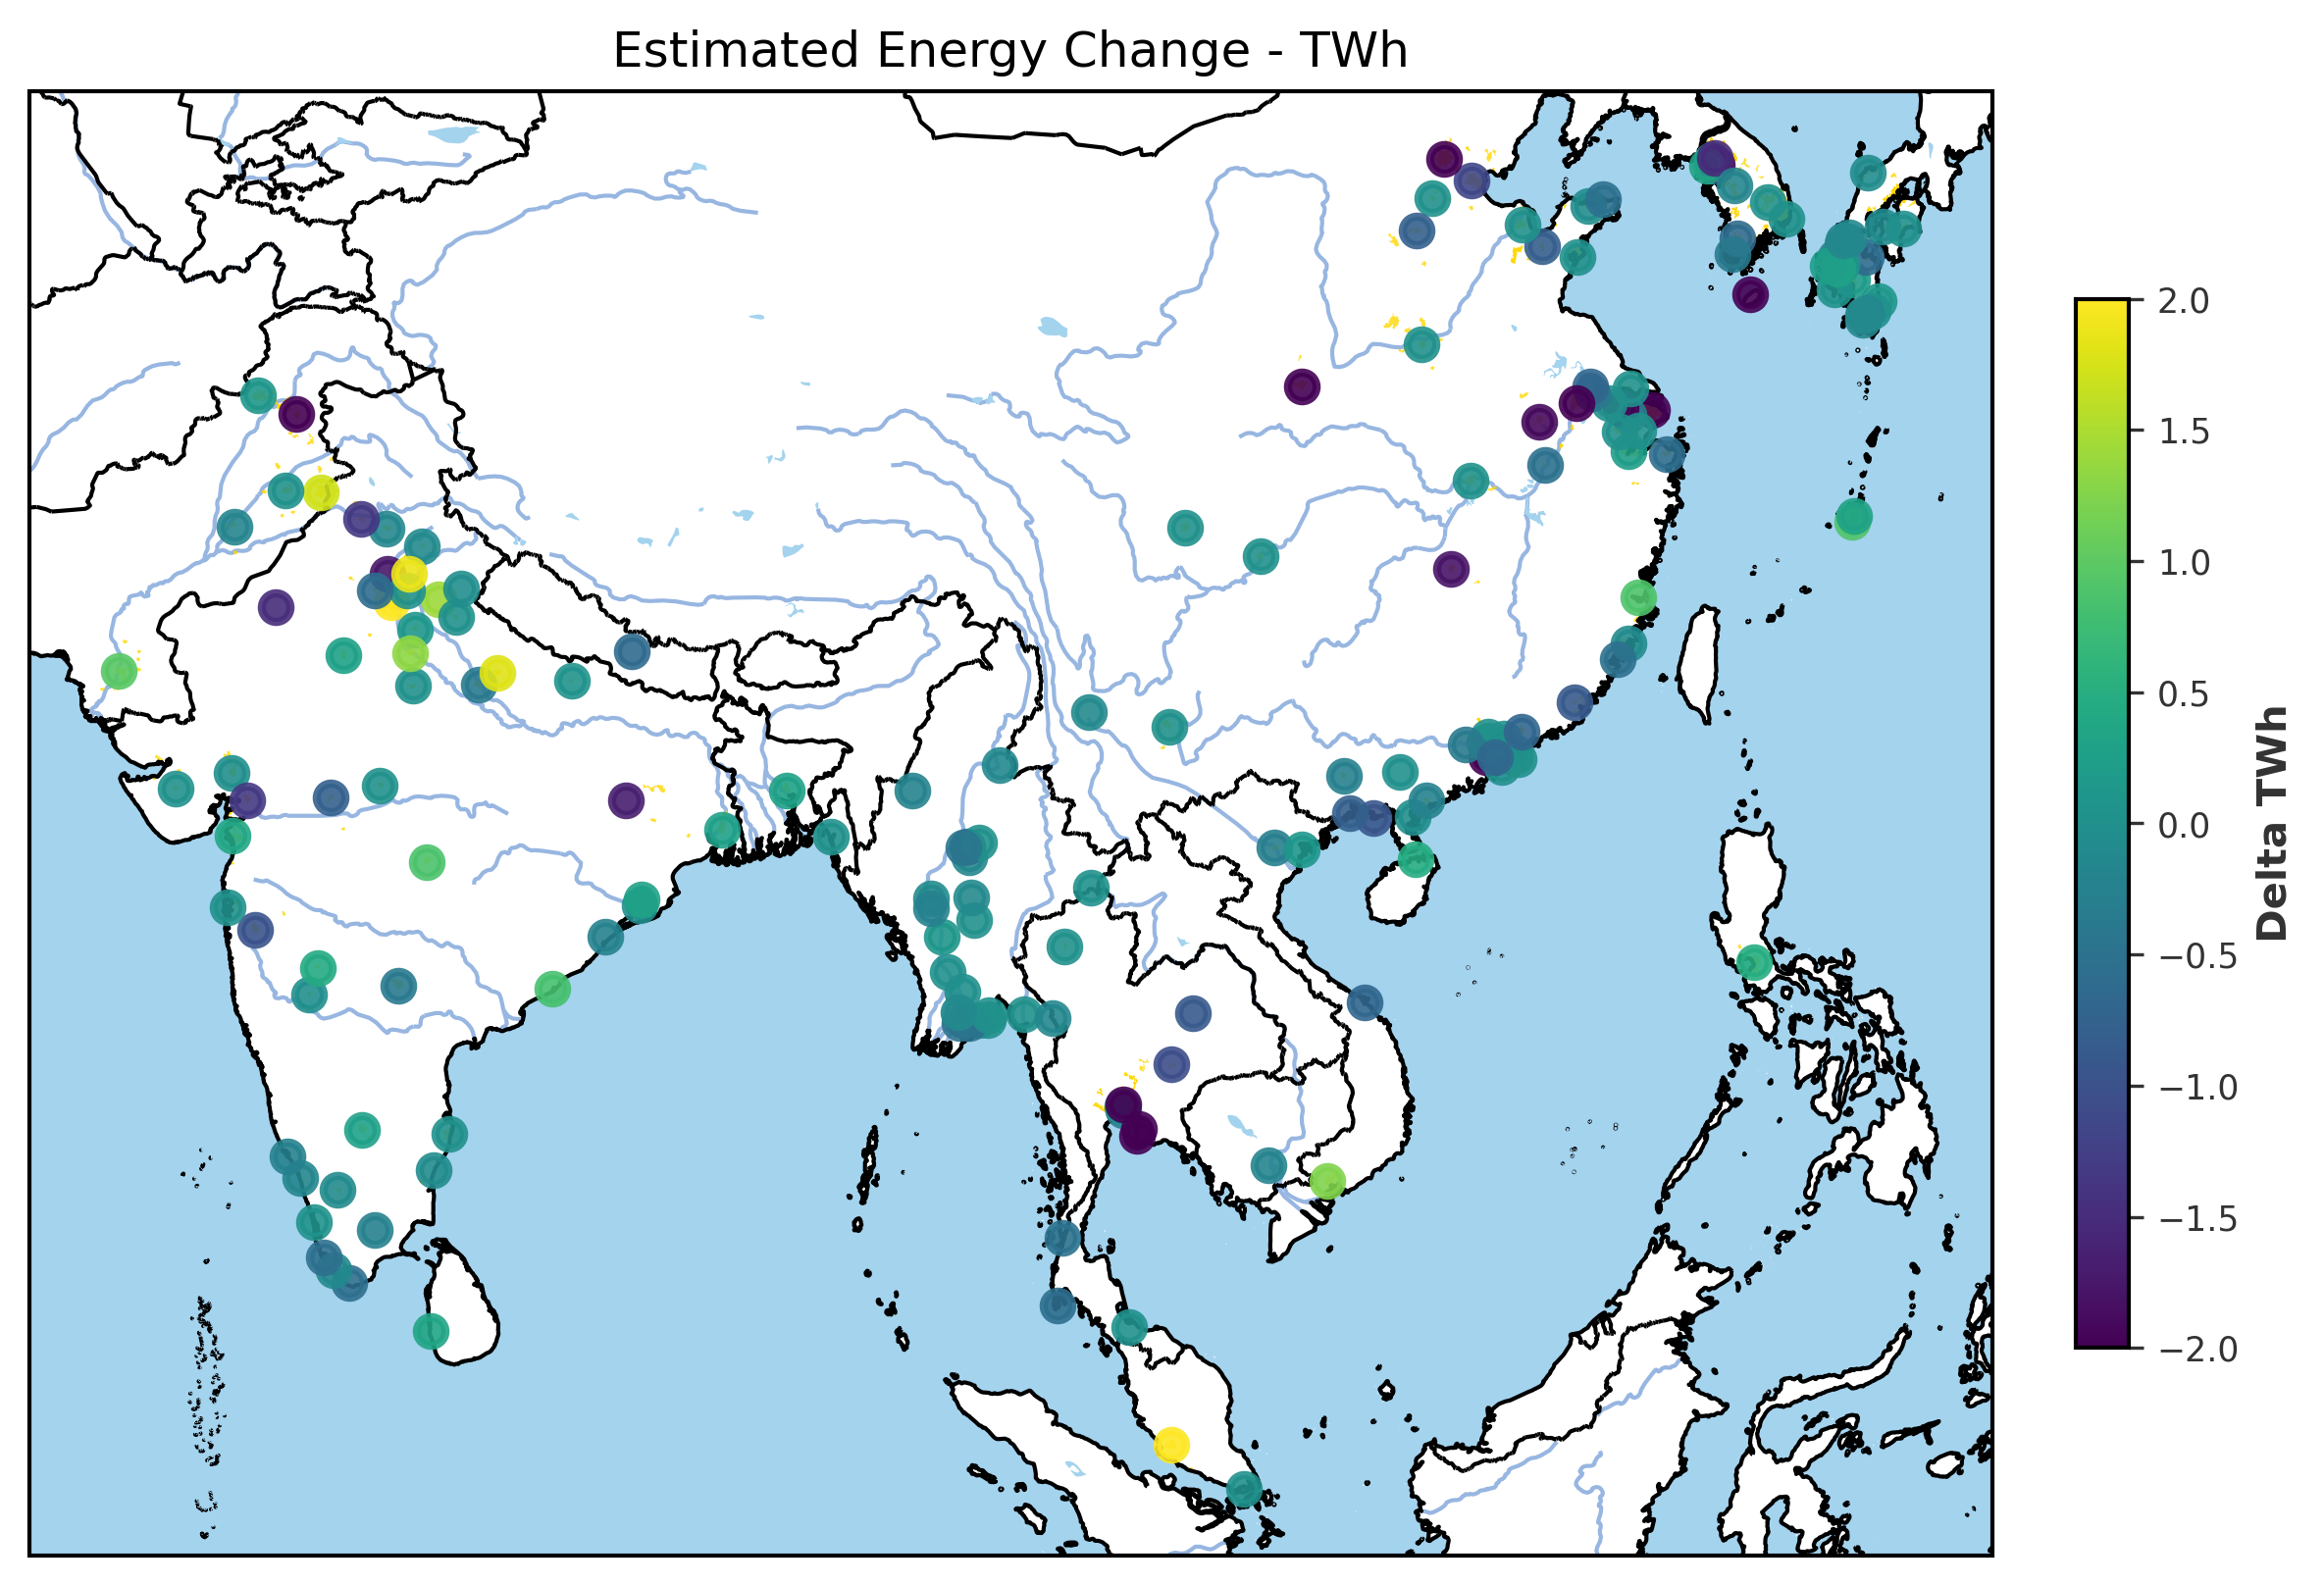

In [527]:
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import cartopy.io.shapereader as shapereader

# Custom colors based on the image provided (replace with actual colors from your image)
water_color = '#a4d3ee'  # A placeholder light blue color for water
land_color = 'white'   # A placeholder light yellow color for land
urban_color = '#ffd700'  # A placeholder darker yellow color for urban areas

# filtered region
# region = "korea, rep."
regional_errors = pd.merge(
    geoerrors,
    city_growth_df,
    left_on="City",
    right_on="City",
    how="left"
)

# Assuming 'color_column' is the column in geoerrors DataFrame based on which you want to set the colors
metric = 'Delta'
color_values = regional_errors[metric]

# Normalize the color values to map to the colormap
norm = mcolors.Normalize(vmin=-2, vmax=2)
cmap = plt.cm.get_cmap('viridis')  # You can choose any available colormap

# Set up the map projection (Orthographic centered on Asia)
projection = ccrs.Orthographic(central_longitude=90, central_latitude=30)

# Create a figure
plt.figure(figsize=(8, 8), dpi=300)
ax = plt.axes(projection=projection)

# Add higher resolution features
ax.add_feature(cfeature.RIVERS.with_scale('50m'), facecolor=water_color)
ax.add_feature(cfeature.LAKES.with_scale('50m'), facecolor=water_color)
ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor=land_color)  # You can adjust the scale

for geom in urban_regions['geometry']:
    ax.add_geometries(
        [geom],  # Add the geometry to a list since add_geometries expects an iterable
        ccrs.PlateCarree(),  # Assuming the geometries are in longitude/latitude
        facecolor=urban_color,
        edgecolor='none',
        alpha=0.8
    )
    
ax.add_feature(cfeature.OCEAN.with_scale('10m'), facecolor=water_color)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.BORDERS.with_scale('10m'))


# Plot each Point geometry with color based on 'color_column'
for point, value in zip(regional_errors.geometry, color_values):
    color = cmap(norm(value))
    ax.plot(
        point.x, 
        point.y, 
        marker='o', 
        markerfacecolor=color,
        markeredgecolor=color,
        markersize=7,
        markeredgewidth=2,  # Adjust border width as needed
        alpha=0.9, 
        transform=ccrs.Geodetic()
    )

# Create a ScalarMappable and use it to create the colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.04)
cbar.set_label("Delta TWh")  # Replace with your label

# Set the extent of the map to focus on Asia
# ax.set_extent([60, 150, 5, 55], crs=ccrs.PlateCarree())

# Set the extent of the map to show only the northern hemisphere
# ax.set_global()
# ax.set_extent([0, 180, 0, 45], crs=ccrs.PlateCarree())
plt.title("Estimated Energy Change - TWh")
plt.tight_layout()

# plt.savefig(f"{metric}_errors.png")

# Show the plot
plt.show()

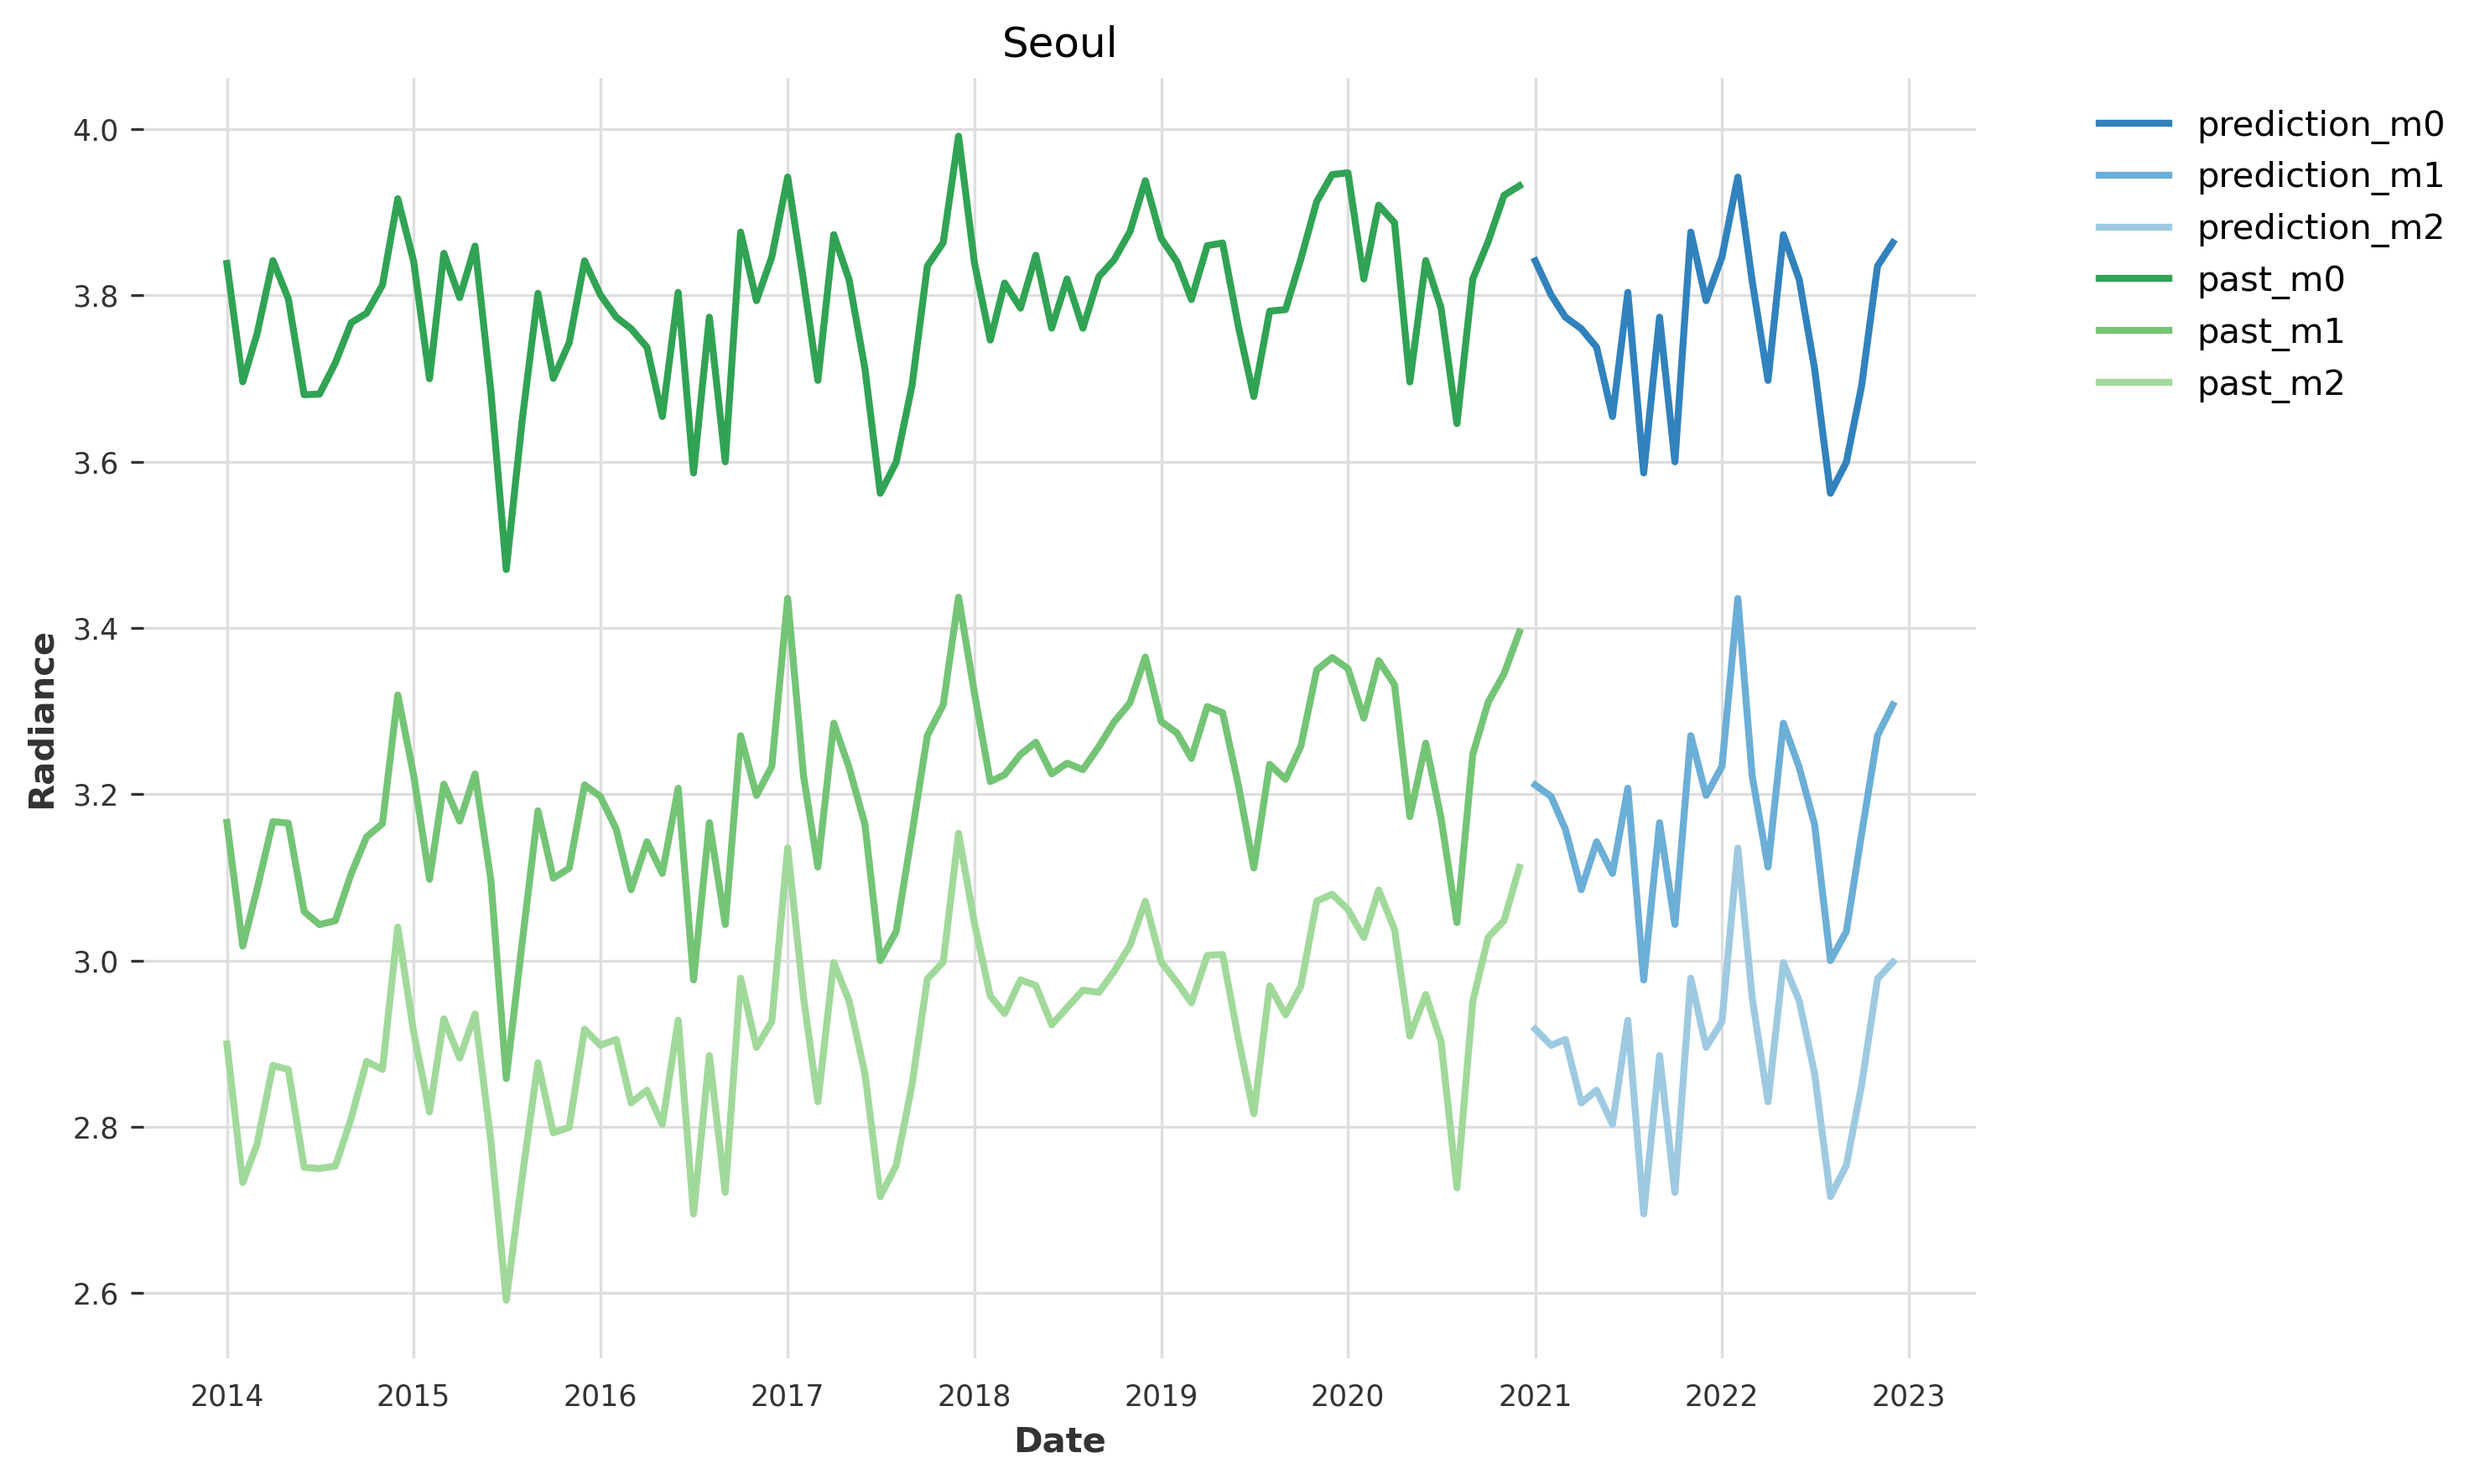

In [514]:
from matplotlib import cycler

city_predictions = 'seoul'
city_series, city_covariates = outcome_mapper[city_predictions]

# Define your custom color cycle (for example, red, green, and blue)
custom_cycler = cycler('color', ['red', 'green', 'blue'])

plt.figure(figsize=(10, 6), dpi=300)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", pcustom)

# training_truth, _ = train_mapper[city_predictions]
# testing_truth, testing_covariates = outcome_mapper[city_predictions]

predictions = model_citymap[city_predictions].predict(
    n = 24,
    series = city_series,
    past_covariates = city_covariates,
)

predictions.plot(label="prediction")
# training_truth.plot(label="past")
city_series.plot(label="past")

plt.title(city_predictions.capitalize())
plt.ylabel("Radiance")

# Adjust the plot size and place the legend outside
plt.gcf().set_size_inches(10, 6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.show()